# 贝叶斯

### 假设各特征之间条件独立

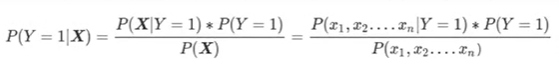

### 对于分子：将先验概率表示为连乘的形式

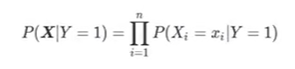

### 对于分母：全概率公式

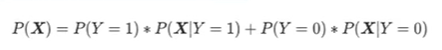

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss as BS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 导入自己写的工具类
from my_tools import *
# 忽略warning
import warnings
warnings.filterwarnings("ignore")

### 加载数据

In [2]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

### 按照贝叶斯的原理，应该对各个特征进行分箱

In [3]:
jibing = fenxiang(jibing)

In [4]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,1,0,3,0,1,0,0,0,1,7,...,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,0
1,1,0,4,0,1,0,0,0,0,7,...,2.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,4.0,2
2,1,0,4,0,1,0,0,0,0,7,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,5.0,0
3,1,0,4,1,1,0,0,0,1,7,...,2.0,1.0,1.0,1.0,1.0,2.0,2.0,6.0,6.0,0
4,1,0,4,1,1,0,0,0,1,7,...,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,5.0,3


In [5]:
clf = GaussianNB()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre)
metrics_

{'precision': 0.9166666666666666,
 'recall': 0.05275779376498801,
 'f1': 0.09977324263038548}

### 产生了准确率高，召回率低，可能是样本不均衡造成的

### 贝叶斯算法是一种概率算法，没办法调参

### 尝试不分箱

In [6]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")
clf = GaussianNB()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre)
metrics_

{'precision': 0.9411764705882353,
 'recall': 0.07565011820330969,
 'f1': 0.1400437636761488}

### 稍微高了一些，但还是不行，尝试归一化

In [7]:
jibing = guiyihua(jibing)
jibing = biaozhunhua(jibing)
clf = GaussianNB()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre)
metrics_

{'precision': 0.9, 'recall': 0.1089588377723971, 'f1': 0.19438444924406048}

### 效果还是不好

In [12]:
clf = BernoulliNB()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre)
metrics_

{'precision': 0.8668076109936576,
 'recall': 0.9975669099756691,
 'f1': 0.9276018099547512}

### 换了一种分类器效果就好了起来，不知道为什么，还在研究